<a href="https://colab.research.google.com/github/JunheeChoi/criminal_project/blob/main/DM_criminal_final__project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 23-1 Data mining final Project

> 주제 : 범죄 관련
## 최종 주제-서울 자치구의 범죄 유형 군집화 분석(Crime Types Clustering by Seoul Atonomous District)


### library loading

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install koreanize_matplotlib
import koreanize_matplotlib
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

In [ ]:
seoul_five_1721_df = pd.read_csv('https://raw.githubusercontent.com/JunheeChoi/criminal_project/main/data/1721_seoul5.csv')
seoul_total_1721df = pd.read_csv('https://raw.githubusercontent.com/JunheeChoi/criminal_project/main/data/1721_%EC%84%9C%EC%9A%B8%EC%8B%9C%EB%B2%94%EC%A3%84%EB%B0%9C%EC%83%9D%ED%98%84%ED%99%A9.csv')
place_5_df = pd.read_csv('https://raw.githubusercontent.com/JunheeChoi/criminal_project/main/data/5%EB%8C%80%EB%B2%94%EC%A3%84%20%EB%B0%9C%EC%83%9D%EC%9E%A5%EC%86%8C%EB%B3%84%20%ED%98%84%ED%99%A9_20230526164207.csv', encoding = 'utf-8')
number_5_df = pd.read_csv('https://raw.githubusercontent.com/JunheeChoi/criminal_project/main/data/%EA%B2%BD%EC%B0%B0%EC%B2%AD_5%EB%8C%80%20%EB%B2%94%EC%A3%84%20%EB%B0%9C%EC%83%9D%EA%B1%B4%EC%88%98_20211231.csv', encoding = 'cp949')
place_df = pd.read_csv('https://raw.githubusercontent.com/JunheeChoi/criminal_project/main/data/%EA%B2%BD%EC%B0%B0%EC%B2%AD_%EB%B2%94%EC%A3%84%20%EB%B0%9C%EC%83%9D%20%EC%9E%A5%EC%86%8C%EB%B3%84%20%ED%86%B5%EA%B3%84_20211231.csv', encoding = 'cp949')
area_df = pd.read_csv('https://raw.githubusercontent.com/JunheeChoi/criminal_project/main/data/%EA%B2%BD%EC%B0%B0%EC%B2%AD_%EB%B2%94%EC%A3%84%20%EB%B0%9C%EC%83%9D%20%EC%A7%80%EC%97%AD%EB%B3%84%20%ED%86%B5%EA%B3%84_20151231.csv', encoding = 'cp949')
suspect_age_df = pd.read_csv('https://raw.githubusercontent.com/JunheeChoi/criminal_project/main/data/%ED%94%BC%EC%9D%98%EC%9E%90(%EC%97%B0%EB%A0%B9%EB%B3%84)_20230525103652.csv', encoding = 'utf-8')
reason_df = pd.read_csv('https://raw.githubusercontent.com/JunheeChoi/criminal_project/main/data/%EA%B2%BD%EC%B0%B0%EC%B2%AD_%EB%B2%94%EC%A3%84%EC%9E%90%20%EB%B2%94%ED%96%89%EB%8F%99%EA%B8%B0_20121231.csv', encoding = 'cp949')
timeweek_df = pd.read_csv('https://raw.githubusercontent.com/JunheeChoi/criminal_project/main/data/%EA%B2%BD%EC%B0%B0%EC%B2%AD_%EB%B2%94%EC%A3%84%20%EB%B0%9C%EC%83%9D%20%EC%8B%9C%EA%B0%84%EB%8C%80%20%EB%B0%8F%20%EC%9A%94%EC%9D%BC_20191231.csv', encoding = 'cp949')
seoul_cctv_df = pd.read_csv('https://raw.githubusercontent.com/JunheeChoi/criminal_project/main/data/%EC%84%9C%EC%9A%B8%EC%8B%9C%20%EC%9E%90%EC%B9%98%EA%B5%AC%20%EB%85%84%EB%8F%84%EB%B3%84%20CCTV%20%EC%84%A4%EC%B9%98%20%ED%98%84%ED%99%A9_221231%EA%B8%B0%EC%A4%80.csv', encoding = 'cp949')
seoul_safe_cctv_df = pd.read_csv('https://raw.githubusercontent.com/JunheeChoi/criminal_project/main/data/%EC%84%9C%EC%9A%B8%EC%8B%9C%20%EC%9E%90%EC%B9%98%EA%B5%AC%20%EC%97%B0%EB%8F%84%EB%B3%84%20%EB%B0%A9%EB%B2%94%EC%9A%A9%20CCTV%20%EC%9A%B4%EC%98%81%20%ED%98%84%ED%99%A9_221231%EA%B8%B0%EC%A4%80.csv', encoding = 'cp949')

In [ ]:
seoul_murderbullying_number_df = pd.read_csv('https://raw.githubusercontent.com/JunheeChoi/criminal_project/main/data/%EA%B2%BD%EC%B0%B0%EC%B2%AD%20%EC%84%9C%EC%9A%B8%ED%8A%B9%EB%B3%84%EC%8B%9C%EA%B2%BD%EC%B0%B0%EC%B2%AD_%EA%B2%BD%EC%B0%B0%EC%84%9C%EB%B3%84%20%EC%82%B4%EC%9D%B8%20%EB%B0%8F%20%ED%8F%AD%EB%A0%A5%20%EC%A3%84%EC%A2%85%20%EB%B2%94%EC%A3%84%EC%9E%90%20%EC%97%B0%EB%A0%B9%EB%8C%80%20%ED%98%84%ED%99%A9_20211231.csv', encoding = 'cp949')
place_5_years_df = pd.read_csv('https://raw.githubusercontent.com/JunheeChoi/criminal_project/main/data/5%EB%8C%80%EB%B2%94%EC%A3%84%20%EB%B0%9C%EC%83%9D%EC%9E%A5%EC%86%8C%EB%B3%84%20%ED%98%84%ED%99%A9_20230526164207.csv', encoding = 'utf-8')
suspectsss_df = pd.read_csv('https://raw.githubusercontent.com/JunheeChoi/criminal_project/main/data/%EA%B2%BD%EC%B0%B0%EC%B2%AD_%EB%B2%94%EC%A3%84%EC%9E%90%20%EB%B2%94%ED%96%89%20%EC%8B%9C%20%EC%97%B0%EB%A0%B9%2C%EC%84%B1%EB%B3%84%2C%EC%A0%95%EC%8B%A0%EC%83%81%ED%83%9C_20181231.csv', encoding = 'cp949')

In [ ]:
# CCTV dataset
seoul_cctv_gu_df = pd.read_csv('https://raw.githubusercontent.com/JunheeChoi/criminal_project/main/data/%EC%84%9C%EC%9A%B8%EC%8B%9C%20%EC%9E%90%EC%B9%98%EA%B5%AC%20%EB%85%84%EB%8F%84%EB%B3%84%20CCTV%20%EC%84%A4%EC%B9%98%20%ED%98%84%ED%99%A9_221231%EA%B8%B0%EC%A4%80.csv', encoding = 'cp949')
cctv_amsim_df = pd.read_csv('https://raw.githubusercontent.com/JunheeChoi/criminal_project/main/data/%EC%84%9C%EC%9A%B8%EC%8B%9C%20%EC%95%88%EC%8B%AC%EC%9D%B4%20CCTV%20%EC%97%B0%EA%B3%84%20%ED%98%84%ED%99%A9.csv', encoding = 'cp949')
seoul_cctv_safe_df = pd.read_csv('https://raw.githubusercontent.com/JunheeChoi/criminal_project/main/data/%EC%84%9C%EC%9A%B8%EC%8B%9C%20%EC%9E%90%EC%B9%98%EA%B5%AC%20%EC%97%B0%EB%8F%84%EB%B3%84%20%EB%B0%A9%EB%B2%94%EC%9A%A9%20CCTV%20%EC%9A%B4%EC%98%81%20%ED%98%84%ED%99%A9_221231%EA%B8%B0%EC%A4%80.csv', encoding = 'cp949')

In [ ]:
nation_1921_df = pd.read_csv('https://raw.githubusercontent.com/JunheeChoi/criminal_project/main/data/%EB%B2%94%EC%A3%84_%EB%B0%9C%EC%83%9D_%EB%B0%8F_%EA%B2%80%EA%B1%B0_%ED%98%84%ED%99%A9_%EC%A0%84%EA%B5%AD__20230605154154.csv', encoding = 'cp949')
time_1921_df = pd.read_csv('https://raw.githubusercontent.com/JunheeChoi/criminal_project/main/data/%EB%B2%94%EC%A3%84_%EB%B0%9C%EC%83%9D%EC%8B%9C%EA%B0%84_20230605153839.csv', encoding = 'cp949')
week_1921_df = pd.read_csv('https://raw.githubusercontent.com/JunheeChoi/criminal_project/main/data/%EB%B2%94%EC%A3%84_%EB%B0%9C%EC%83%9D%EC%8B%9C%EA%B0%84_20230605153839.csv', encoding = 'cp949')
place_1921_df = pd.read_csv('https://raw.githubusercontent.com/JunheeChoi/criminal_project/main/data/%EB%B2%94%EC%A3%84_%EB%B0%9C%EC%83%9D%EC%9E%A5%EC%86%8C_20230605153944.csv', encoding = 'cp949')
location_1921_df = pd.read_csv('https://raw.githubusercontent.com/JunheeChoi/criminal_project/main/data/%EB%B2%94%EC%A3%84_%EB%B0%9C%EC%83%9D%EC%A7%80_20230605154257.csv', encoding = 'cp949')
seoul_5_place_df =pd.read_csv('https://raw.githubusercontent.com/JunheeChoi/criminal_project/main/data/%EA%B2%BD%EC%B0%B0%EC%B2%AD%20%EC%84%9C%EC%9A%B8%ED%8A%B9%EB%B3%84%EC%8B%9C%EA%B2%BD%EC%B0%B0%EC%B2%AD_5%EB%8C%80%EB%B2%94%EC%A3%84%20%EB%B0%9C%EC%83%9D%20%EC%9E%A5%EC%86%8C%EB%B3%84%20%ED%98%84%ED%99%A9_20211231.csv', encoding = 'cp949')

------

### 5년간 전국 5대 범죄 건수

In [ ]:
number_5_df.head()

,구분,2016,2017,2018,2019,2020,2021
0,살인,906,818,791,775,720,652
1,강도,1149,965,818,798,662,495
2,강간 강제추행,22193,24106,23467,23531,21702,20269
3,절도,202874,183565,176613,186649,179315,166251
4,폭력,308776,292524,286599,287257,265148,232018


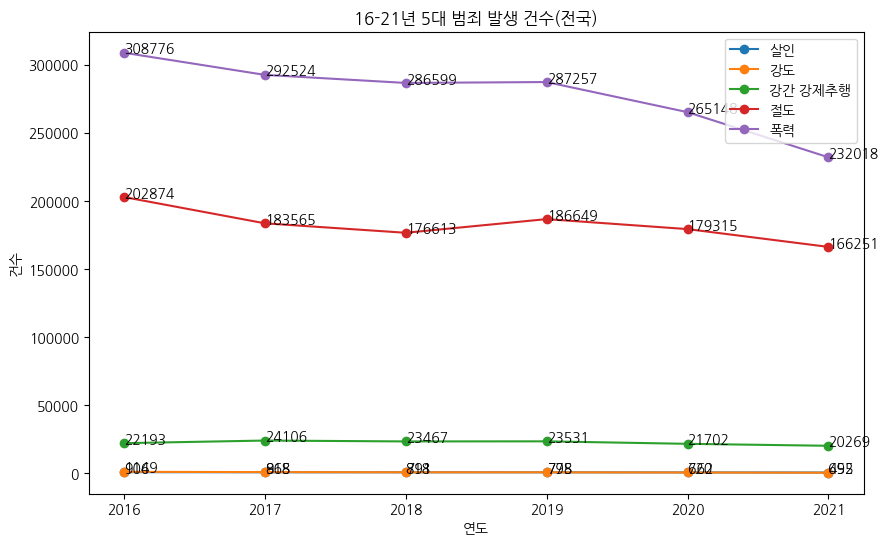

<Figure size 640x480 with 0 Axes>

In [ ]:
# 21년 5대 범죄 발생 건수

plt.figure(figsize=(10,6))
for i in range(0,5):
    plt.plot(list(number_5_df.columns[1:]), list(number_5_df.iloc[i, 1:].values), marker = 'o', )
    for j, value in enumerate(list(number_5_df.iloc[i, 1:].values)):
        plt.text(list(number_5_df.columns[1:])[j], value, str(value))
plt.title('16-21년 5대 범죄 발생 건수(전국)')
plt.xlabel('연도')
plt.ylabel('건수')
plt.legend(list(number_5_df.iloc[:, 0]))

plt.show()
plt.savefig('16-21 5대 범죄 선그래프.png')

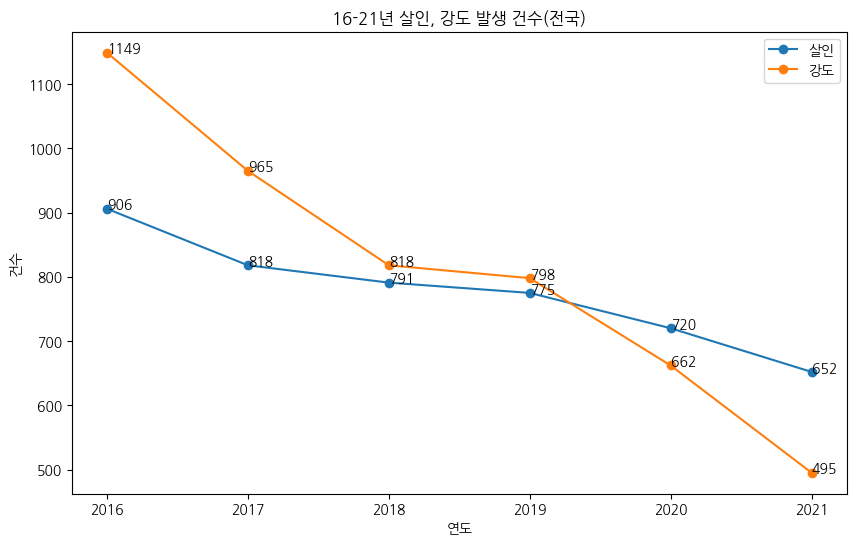

In [ ]:
# 살인, 강도 범죄 건수
plt.figure(figsize=(10,6))
for i in range(0,2):
    plt.plot(list(number_5_df.columns[1:]), list(number_5_df.iloc[i, 1:].values), marker = 'o', )
    for j, value in enumerate(list(number_5_df.iloc[i, 1:].values)):
        plt.text(list(number_5_df.columns[1:])[j], value, str(value))
plt.title('16-21년 살인, 강도 발생 건수(전국)')
plt.xlabel('연도')
plt.ylabel('건수')
plt.legend(list(number_5_df.iloc[:, 0]))

plt.show()

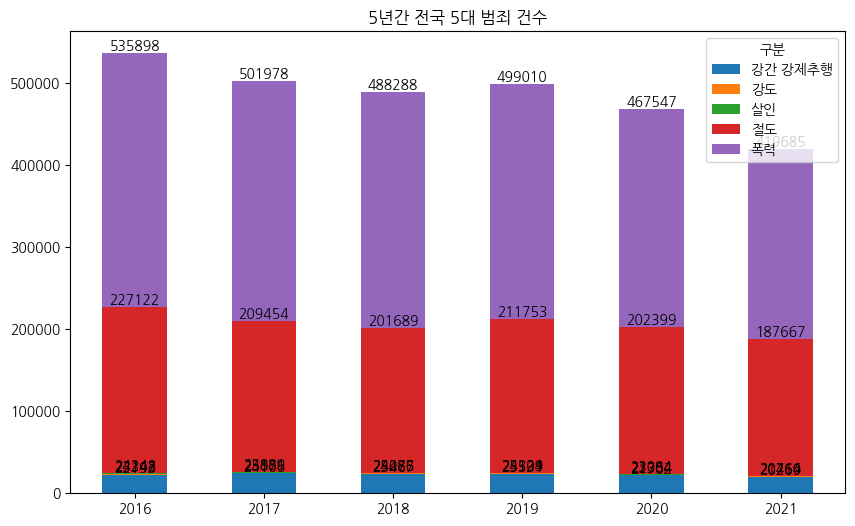

In [ ]:
number1_df = number_5_df.groupby(['구분']).sum()
numplot = number1_df.T.plot(kind = 'bar', figsize = (10, 6), stacked = True)
plt.xticks(rotation = 360)
for p in numplot.containers:
    numplot.bar_label(p, label_type='edge')

# x축 눈금의 텍스트 방향 설정
numplot.set_xticklabels(numplot.get_xticklabels())
plt.title('5년간 전국 5대 범죄 건수')
plt.savefig('5년간전국5대범죄건수.png')

------------------------------------

### 지역별 범죄건수

In [ ]:
area_df.head()

,범죄대분류,범죄중분류,서울,부산,대구,인천,광주,대전,울산,세종,...,경남 밀양,경남 사천,경남 양산,경남 진주,경남 창원,경남 통영,제주 서귀포,제주 제주,기타도시,도시이외
0,강력범죄,살인기수,67,20,13,17,11,8,12,2,...,1,0,2,4,7,2,0,11,7,30
1,강력범죄,살인미수등,96,41,23,34,7,16,11,1,...,5,5,6,0,13,2,1,16,4,44
2,강력범죄,강도,274,161,60,103,44,64,29,0,...,1,4,2,13,26,3,4,29,4,65
3,강력범죄,강간,969,383,216,304,216,181,132,3,...,10,12,35,63,85,11,14,64,18,328
4,강력범죄,유사강간,118,24,21,35,17,14,10,1,...,1,1,3,1,8,1,1,12,0,33


In [ ]:
area1_df = area_df.groupby(['범죄대분류', '범죄중분류']).sum()

area1_df = area1_df.astype(int)
area1_df.head(5)

서울   부산   대구   인천   광주   대전   울산  세종  경기 고양  경기 과천  ...  \
범죄대분류 범죄중분류                                                            ...   
강력범죄  강간          969  383  216  304  216  181  132   3     73      0  ...   
      강도          274  161   60  103   44   64   29   0     14      0  ...   
      강제추행       4282  991  645  924  495  362  293  34    256     20  ...   
      기타강간강제추행등    94   37   20   31   22   12    9   0      7      0  ...   
      방화          315  117   86   94   48   41   36   5     40      1  ...   

                 경남 밀양  경남 사천  경남 양산  경남 진주  경남 창원  경남 통영  제주 서귀포  제주 제주  \
범죄대분류 범죄중분류                                                                
강력범죄  강간            10     12     35     63     85     11      14     64   
      강도             1      4      2     13     26      3       4     29   
      강제추행          20     22     59     58    172     36      32    165   
      기타강간강제추행등      1      2      1      4     13      3       1     11   
      방화             2      7      9     12     33      0      12     23   

                 기타도시  도시이외  
범죄대분류 범죄중분류                  
강력범죄  강간           18   328  
      강도            4    65  
      강제추행         28   764  
      기타강간강제추행등     2    55  
      방화            4   148  

[5 rows x 88 columns]

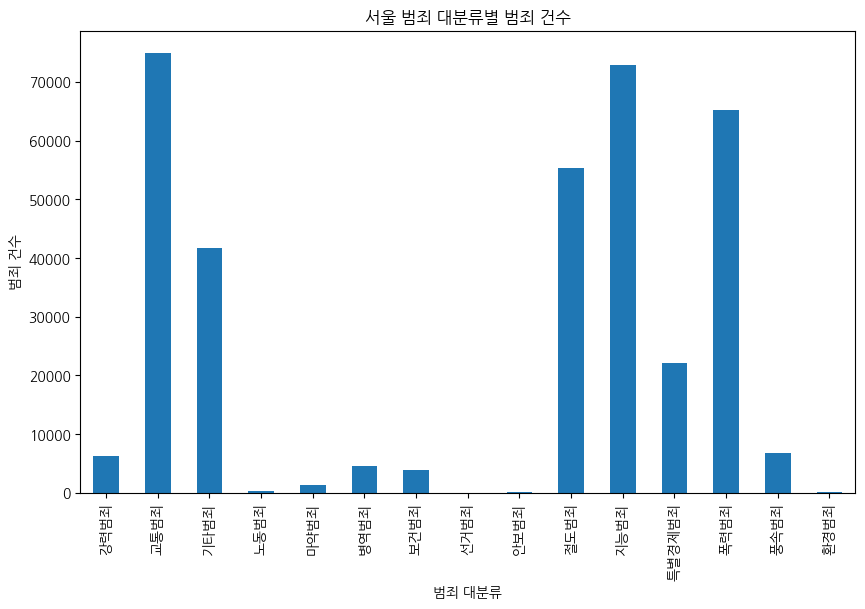

<Figure size 640x480 with 0 Axes>

In [ ]:
# 범죄 대분류별 데이터 추출
crime_category = area1_df.groupby('범죄대분류').sum()['서울']

# 막대 그래프 시각화
crime_category.plot(kind='bar', figsize=(10, 6))
plt.title('서울 범죄 대분류별 범죄 건수')
plt.xlabel('범죄 대분류')
plt.ylabel('범죄 건수')

plt.show()
plt.savefig('서울 범죄 대분류별 범죄 건수.png')

In [ ]:
fcols = area1_df.filter(regex = '^경기').sum(axis = 1)
area1_df.drop(area1_df.filter(regex = '^경기').columns, axis = 1, inplace = True)
area1_df['경기'] = fcols

fcols2 = area1_df.filter(regex = '^강원').sum(axis = 1)
area1_df.drop(area1_df.filter(regex = '^강원').columns, axis = 1, inplace = True)
area1_df['강원'] = fcols2


fcols3 = area1_df.filter(regex = '^경남|^경북').sum(axis = 1)
area1_df.drop(area1_df.filter(regex = '^경남|^경북').columns, axis = 1, inplace = True)
area1_df['경상'] = fcols3


fcols4 = area1_df.filter(regex = '^충').sum(axis = 1)
area1_df.drop(area1_df.filter(regex = '^충').columns, axis = 1, inplace = True)
area1_df['충청'] = fcols4


fcols5 = area1_df.filter(regex = '^전북|^전남').sum(axis = 1)
area1_df['전라'] = fcols5
area1_df.drop(area1_df.filter(regex = '^전북|^전남').columns, axis = 1, inplace = True)

fcols5 = area1_df.filter(regex = '^제주').sum(axis = 1)
area1_df.drop(area1_df.filter(regex = '^제주').columns, axis = 1, inplace = True)
area1_df['제주'] = fcols5


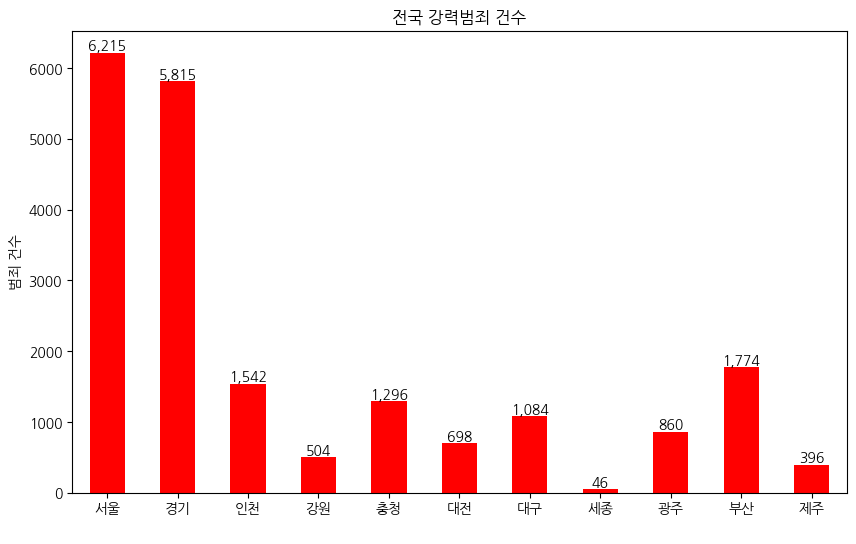

<Figure size 640x480 with 0 Axes>

In [ ]:
# 강력범죄 데이터 추출
crime_category1 = area1_df.groupby('범죄대분류').sum().iloc[0][['서울', '경기', '인천', '강원', '충청', '대전', '대구', '세종', '광주', '부산','제주']]

# 막대 그래프 시각화
crime_plot = crime_category1.plot(kind='bar', figsize=(10, 6), color = 'red')
plt.title('전국 강력범죄 건수')
plt.xlabel(' ')
plt.ylabel('범죄 건수')
plt.xticks(rotation=0)

# 막대 위에 값 표시
for rect in crime_plot.patches:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height, f'{int(height):,}', ha='center', va='bottom')

plt.show()
plt.savefig('전국강력범죄건수(2021년).png')

---

### 시간대별 범죄 유형별 발생 건수

In [ ]:
# 2020년, 2021년 별 나누기
# 2020 : 훈련 데이터, 2021 : 검증 데이터
time_1921_df.head()

,죄종별(1),죄종별(2),2020,2020.1,2020.2,2020.3,2020.4,2020.5,2020.6,2020.7,...,2021,2021.1,2021.2,2021.3,2021.4,2021.5,2021.6,2021.7,2021.8,2021.9
0,죄종별(1),죄종별(2),계,00:00~02:59,03:00~05:59,06:00~08:59,09:00~11:59,12:00~14:59,15:00~17:59,18:00~20:59,...,계,00:00~02:59,03:00~05:59,06:00~08:59,09:00~11:59,12:00~14:59,15:00~17:59,18:00~20:59,21:00~23:59,미상
1,계,소계,1587866,86398,81043,81052,174325,172610,177378,176642,...,1429826,57763,50928,68799,147157,164739,171860,171036,194712,402832
2,강력범죄,소계,24332,2642,2754,1478,1736,1913,2203,2864,...,22476,1908,1752,1204,1542,1912,2254,2946,4550,4408
3,강력범죄,살인기수,308,20,30,23,29,23,34,53,...,270,18,17,17,29,24,32,49,38,46
4,강력범죄,살인미수등,416,35,27,40,38,34,49,46,...,388,21,33,24,42,30,42,59,62,75


In [ ]:
time_192121_df = time_1921_df.copy()
time_20_df = time_192121_df.drop(time_192121_df.filter(regex = '^2021'), axis = 1)
time_20_df.columns = time_20_df.iloc[0]

In [ ]:
time_20_df.drop(['계'], axis = 1, inplace = True)

In [ ]:
time_20_df = time_20_df[3:]

In [ ]:
time_20_df = time_20_df.replace('-', 0)
time_20_df = time_20_df.groupby(['죄종별(1)', '죄종별(2)']).sum()

In [ ]:
time_20_df.drop(['미상'], axis = 1, inplace = True)

In [ ]:
time_20_df = time_20_df[time_20_df.index != '기타범죄']

In [ ]:
time_20_df.head()

0                  00:00~02:59 03:00~05:59 06:00~08:59 09:00~11:59  \
죄종별(1) 죄종별(2)                                                        
강력범죄   강간                  636         750         358         337   
       강도                   80          93          34          57   
       강제추행               1619        1568         882        1096   
       기타 강간·강제추행등          24          27          16          20   
       방화                  132         132          67         105   

0                  12:00~14:59 15:00~17:59 18:00~20:59 21:00~23:59  
죄종별(1) 죄종별(2)                                                       
강력범죄   강간                  331         326         457         731  
       강도                   63          71          61          90  
       강제추행               1271        1521        1972        2834  
       기타 강간·강제추행등          22          15          23          27  
       방화                  124         128         182         224

In [ ]:
time_20t_df = time_20_df.T
time_20t_df

죄종별(1)      강력범죄                                              교통범죄   기타범죄  \
죄종별(2)        강간  강도  강제추행 기타 강간·강제추행등   방화 살인기수 살인미수등 유사강간     소계     소계   
0                                                                           
00:00~02:59  636  80  1619          24  132   20    35   96  23344   9487   
03:00~05:59  750  93  1568          27  132   30    27  127  21560  10760   
06:00~08:59  358  34   882          16   67   23    40   58  31329  10899   
09:00~11:59  337  57  1096          20  105   29    38   54  39356  30333   
12:00~14:59  331  63  1271          22  124   23    34   45  44060  24228   
15:00~17:59  326  71  1521          15  128   34    49   59  51132  21210   
18:00~20:59  457  61  1972          23  182   53    46   70  56373  19093   
21:00~23:59  731  90  2834          27  224   34    78  142  63335  21458   

죄종별(1)       ...   폭력범죄                                풍속범죄             환경범죄  
죄종별(2)       ...     손괴 약취·유인 체포·감금 폭력행위등     폭행    협박 도박범죄 성풍속범죄    소계   소계  
0            ...                                                              
00:00~02:59  ...   5001     7    85  1116  15946  1235  150   818   968   14  
03:00~05:59  ...   4357     6   104  1025  13505  1022   94   591   685   23  
06:00~08:59  ...   3971     8    70   394   8012  1340   65   733   798   75  
09:00~11:59  ...   5232    21   110   424  10517  2225  446  1174  1620  411  
12:00~14:59  ...   5198    43   138   475  11525  2348  399  1231  1630  263  
15:00~17:59  ...   6722    48   140   632  13960  2799  760  1764  2524  165  
18:00~20:59  ...   9381    24   142   802  19596  3324  902  1646  2548   61  
21:00~23:59  ...  10293    11   170  1247  30110  3335  784  1987  2771   74  

[8 rows x 41 columns]

In [ ]:
time_20t_df['시간대'] = time_20t_df.index

In [ ]:
time_20t_df

죄종별(1)      강력범죄                                              교통범죄   기타범죄  \
죄종별(2)        강간  강도  강제추행 기타 강간·강제추행등   방화 살인기수 살인미수등 유사강간     소계     소계   
0                                                                           
00:00~02:59  636  80  1619          24  132   20    35   96  23344   9487   
03:00~05:59  750  93  1568          27  132   30    27  127  21560  10760   
06:00~08:59  358  34   882          16   67   23    40   58  31329  10899   
09:00~11:59  337  57  1096          20  105   29    38   54  39356  30333   
12:00~14:59  331  63  1271          22  124   23    34   45  44060  24228   
15:00~17:59  326  71  1521          15  128   34    49   59  51132  21210   
18:00~20:59  457  61  1972          23  182   53    46   70  56373  19093   
21:00~23:59  731  90  2834          27  224   34    78  142  63335  21458   

죄종별(1)       ...  폭력범죄                          풍속범죄             환경범죄  \
죄종별(2)       ... 약취·유인 체포·감금 폭력행위등     폭행    협박 도박범죄 성풍속범죄    소계   소계   
0            ...                                                        
00:00~02:59  ...     7    85  1116  15946  1235  150   818   968   14   
03:00~05:59  ...     6   104  1025  13505  1022   94   591   685   23   
06:00~08:59  ...     8    70   394   8012  1340   65   733   798   75   
09:00~11:59  ...    21   110   424  10517  2225  446  1174  1620  411   
12:00~14:59  ...    43   138   475  11525  2348  399  1231  1630  263   
15:00~17:59  ...    48   140   632  13960  2799  760  1764  2524  165   
18:00~20:59  ...    24   142   802  19596  3324  902  1646  2548   61   
21:00~23:59  ...    11   170  1247  30110  3335  784  1987  2771   74   

죄종별(1)               시간대  
죄종별(2)                    
0                         
00:00~02:59  00:00~02:59  
03:00~05:59  03:00~05:59  
06:00~08:59  06:00~08:59  
09:00~11:59  09:00~11:59  
12:00~14:59  12:00~14:59  
15:00~17:59  15:00~17:59  
18:00~20:59  18:00~20:59  
21:00~23:59  21:00~23:59  

[8 rows x 42 columns]

In [ ]:
time_20t_df.columns

MultiIndex([(  '강력범죄',          '강간'),
            (  '강력범죄',          '강도'),
            (  '강력범죄',        '강제추행'),
            (  '강력범죄', '기타 강간·강제추행등'),
            (  '강력범죄',          '방화'),
            (  '강력범죄',        '살인기수'),
            (  '강력범죄',       '살인미수등'),
            (  '강력범죄',        '유사강간'),
            (  '교통범죄',          '소계'),
            (  '기타범죄',          '소계'),
            (  '노동범죄',          '소계'),
            (  '마약범죄',          '소계'),
            (  '병역범죄',          '소계'),
            (  '보건범죄',          '소계'),
            (  '선거범죄',          '소계'),
            (  '안보범죄',          '소계'),
            (  '절도범죄',          '소계'),
            (  '지능범죄',       '문서·인장'),
            (  '지능범죄',          '배임'),
            (  '지능범죄',          '사기'),
            (  '지능범죄',          '소계'),
            (  '지능범죄',      '유가증권인지'),
            (  '지능범죄',         '증수뢰'),
            (  '지능범죄',        '직권남용'),
            (  '지능범죄',        '직무유기'),
            (  '지능범죄',   

In [ ]:
filtered_20 = ['강력범죄']
filtered_20_df = time_20t_df[filtered_20]
filtered_20_df.columns = filtered_20_df.columns.droplevel(0)

In [ ]:
filtered_20_df

죄종별(2),강간,강도,강제추행,기타 강간·강제추행등,방화,살인기수,살인미수등,유사강간
0,,,,,,,,
00:00~02:59,636,80,1619,24,132,20,35,96
03:00~05:59,750,93,1568,27,132,30,27,127
06:00~08:59,358,34,882,16,67,23,40,58
09:00~11:59,337,57,1096,20,105,29,38,54
12:00~14:59,331,63,1271,22,124,23,34,45
15:00~17:59,326,71,1521,15,128,34,49,59
18:00~20:59,457,61,1972,23,182,53,46,70
21:00~23:59,731,90,2834,27,224,34,78,142


In [ ]:
filtered_20__df= pd.DataFrame({'시간대': ['00:00~02:59', '03:00~05:59', '06:00~08:59', '09:00~11:59', '12:00~14:59', '15:00~17:59', '18:00~20:59', '21:00~23:59'],
        '강간': [636, 750, 358, 337, 331, 326, 457, 731],
        '강도': [80, 93, 34, 57, 63, 71, 61, 90],
        '강제추행': [1619, 1568, 882, 1096, 1271, 1521, 1972, 2834],
        '기타 강간·강제추행등': [24, 27, 16, 20, 22, 15, 23, 27],
        '방화': [132, 132, 67, 105, 124, 128, 182, 224],
        '살인기수': [20, 30, 23, 29, 23, 34, 53, 34],
        '살인미수등': [35, 27, 40, 38, 34, 49, 46, 78],
        '유사강간': [96, 127, 58, 54, 45, 59, 70, 142]})
filtered_20__df

,시간대,강간,강도,강제추행,기타 강간·강제추행등,방화,살인기수,살인미수등,유사강간
0,00:00~02:59,636,80,1619,24,132,20,35,96
1,03:00~05:59,750,93,1568,27,132,30,27,127
2,06:00~08:59,358,34,882,16,67,23,40,58
3,09:00~11:59,337,57,1096,20,105,29,38,54
4,12:00~14:59,331,63,1271,22,124,23,34,45
5,15:00~17:59,326,71,1521,15,128,34,49,59
6,18:00~20:59,457,61,1972,23,182,53,46,70
7,21:00~23:59,731,90,2834,27,224,34,78,142


In [ ]:
from sklearn.svm import SVC

# '시간대'를 숫자로 변환
time_mapping = {time: i for i, time in enumerate(filtered_20__df['시간대'])}
filtered_20__df['시간대'] = filtered_20__df['시간대'].map(time_mapping)

# 입력 변수 (X) 설정
X = filtered_20__df[['시간대']]

# 개별 범죄 종류에 대해 SVM 모델 적용
for column in filtered_20__df.columns[1:]:
    y =filtered_20__df[column]

    # 데이터 분할 (학습 데이터와 테스트 데이터)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # SVM 모델 학습
    svm = SVC()
    svm.fit(X_train, y_train)

    # 학습된 모델로 테스트 데이터 예측
    y_pred = svm.predict(X_test)

    # 정확도 계산
    accuracy = accuracy_score(y_test, y_pred)
    print(f"범죄 종류: {column}")
    print(f"정확도: {accuracy}")

범죄 종류: 강간
정확도: 0.0
범죄 종류: 강도
정확도: 0.0
범죄 종류: 강제추행
정확도: 0.0
범죄 종류: 기타 강간·강제추행등
정확도: 0.0
범죄 종류: 방화
정확도: 0.5
범죄 종류: 살인기수
정확도: 0.0
범죄 종류: 살인미수등
정확도: 0.0
범죄 종류: 유사강간
정확도: 0.0


In [ ]:
location_1921_df.head()

,죄종별(1),죄종별(2),2019,2019.1,2019.2,2019.3,2019.4,2019.5,2019.6,2019.7,...,2021.78,2021.79,2021.80,2021.81,2021.82,2021.83,2021.84,2021.85,2021.86,2021.87
0,죄종별(1),죄종별(2),계,서울,부산,대구,인천,광주,대전,울산,...,경상남도,경상남도,경상남도,경상남도,경상남도,경상남도,제주특별자치도,제주특별자치도,기타도시,도시이외
1,죄종별(1),죄종별(2),소계,소계,소계,소계,소계,소계,소계,소계,...,밀양시,사천시,양산시,진주시,창원시,통영시,서귀포시,제주시,소계,소계
2,계,소계,1611906,305909,119267,75707,93347,44102,45047,34128,...,2582,5440,9699,9228,26824,5100,7038,18865,21704,93833
3,강력범죄,소계,26476,6977,1716,1095,1749,753,802,516,...,33,41,108,114,383,48,115,336,39,1361
4,강력범죄,살인기수,297,45,22,14,20,11,7,10,...,1,2,1,3,3,1,2,4,2,29


------------------------------------------------------------------------------

### 17-21년 서울 5대 강력 범죄 자치구별 건수

In [ ]:
seoul_five_1721_df

,자치구별(1),자치구별(2),2017,2017.1,2017.2,2017.3,2017.4,2017.5,2017.6,2017.7,...,2021.2,2021.3,2021.4,2021.5,2021.6,2021.7,2021.8,2021.9,2021.10,2021.11
0,자치구별(1),자치구별(2),합계,합계,합계,합계,합계,합계,합계,합계,...,합계,합계,합계,합계,합계,합계,합계,합계,합계,합계
1,자치구별(1),자치구별(2),소계,소계,살인,살인,강도,강도,강간·강제추행,강간·강제추행,...,살인,살인,강도,강도,강간·강제추행,강간·강제추행,절도,절도,폭력,폭력
2,자치구별(1),자치구별(2),발생,검거,발생,검거,발생,검거,발생,검거,...,발생,검거,발생,검거,발생,검거,발생,검거,발생,검거
3,합계,소계,107835,79865,142,140,169,170,6963,6558,...,124,112,122,116,4911,4446,33531,17950,41757,35388
4,합계,종로구,4057,4437,7,9,10,15,253,1412,...,6,3,4,4,156,757,1079,743,1467,1248
5,합계,중구,4184,2851,1,-,9,9,267,149,...,6,6,6,6,161,97,1279,739,1409,1224
6,합계,용산구,4060,2936,1,1,5,4,327,289,...,3,2,1,1,141,103,945,484,1291,1069
7,합계,성동구,2767,2031,1,1,3,3,132,106,...,3,4,4,1,110,82,905,497,1090,926
8,합계,광진구,4646,3289,6,5,13,8,261,208,...,5,3,4,4,208,161,1414,754,1456,1280
9,합계,동대문구,3975,3274,11,10,3,5,165,149,...,3,4,7,8,169,147,1240,659,1540,1295


In [ ]:
# 필요한 부분만 추출 (자치구, 범죄 종류, 건수 데이터)

seoul_five_1721__df = seoul_five_1721_df.iloc[3:].reset_index(drop=True)
seoul_five_1721__df.columns = seoul_five_1721__df.iloc[0]
seoul_five_1721__df = seoul_five_1721__df[1:].reset_index(drop=True)

seoul_five_1721__df = seoul_five_1721__df.iloc[:, 1:]

In [ ]:
seoul_five_1721__df.replace('-', 0)
seoul_five_1721__df.columns = seoul_five_1721_df.iloc[1, 1:]

In [ ]:
seoul_five_1721__df.head()

1,자치구별(2),소계,소계,살인,살인,강도,강도,강간·강제추행,강간·강제추행,절도,...,살인,살인,강도,강도,강간·강제추행,강간·강제추행,절도,절도,폭력,폭력
0,종로구,4057,4437,7,9,10,15,253,1412,1644,...,6,3,4,4,156,757,1079,743,1467,1248
1,중구,4184,2851,1,-,9,9,267,149,1846,...,6,6,6,6,161,97,1279,739,1409,1224
2,용산구,4060,2936,1,1,5,4,327,289,1346,...,3,2,1,1,141,103,945,484,1291,1069
3,성동구,2767,2031,1,1,3,3,132,106,1072,...,3,4,4,1,110,82,905,497,1090,926
4,광진구,4646,3289,6,5,13,8,261,208,2220,...,5,3,4,4,208,161,1414,754,1456,1280


In [ ]:
seoul_five_1721__df.drop(['소계', '소계'],  axis = 1, inplace = True)

In [ ]:
seoul_five_1721__df.iloc[:, 0]

In [ ]:
crime20_df = seoul_five_1721__df.iloc[:, [0] + list(range(1, seoul_five_1721__df.shape[1], 2))]
crime20_df            ## 살인, 강도, 등 5대 범죄..

1,자치구별(2),살인,강도,강간·강제추행,절도,폭력,살인,강도,강간·강제추행,절도,...,살인,강도,강간·강제추행,절도,폭력,살인,강도,강간·강제추행,절도,폭력
0,종로구,7,10,253,1644,2143,6,3,236,1483,...,9,7,192,1183,1711,6,4,156,1079,1467
1,중구,1,9,267,1846,2061,2,11,207,1855,...,2,5,186,1642,1576,6,6,161,1279,1409
2,용산구,1,5,327,1346,2381,1,3,331,1096,...,5,6,230,1111,1617,3,1,141,945,1291
3,성동구,1,3,132,1072,1559,2,5,126,999,...,5,3,115,1016,1223,3,4,110,905,1090
4,광진구,6,13,261,2220,2146,7,2,229,1769,...,2,4,255,1664,1676,5,4,208,1414,1456
5,동대문구,11,3,165,1547,2249,2,5,145,1447,...,10,6,161,1440,1784,3,7,169,1240,1540
6,중랑구,5,3,172,1533,2858,4,3,174,1526,...,10,5,183,1506,2022,4,6,141,1399,1660
7,성북구,7,8,173,1344,1902,7,1,183,1164,...,4,3,142,988,1430,4,2,118,895,1392
8,강북구,8,7,208,1014,2156,8,7,188,1112,...,9,5,159,780,1817,4,1,136,777,1383
9,도봉구,1,3,104,633,1258,1,5,113,781,...,-,2,82,861,1234,2,2,72,772,1012


In [ ]:
crime5_df = crime20_df.set_index(crime20_df.columns[0])
crime5_df

1,살인,강도,강간·강제추행,절도,폭력,살인,강도,강간·강제추행,절도,폭력,...,살인,강도,강간·강제추행,절도,폭력,살인,강도,강간·강제추행,절도,폭력
자치구별(2),,,,,,,,,,,,,,,,,,,,,
종로구,7,10,253,1644,2143,6,3,236,1483,1962,...,9,7,192,1183,1711,6,4,156,1079,1467
중구,1,9,267,1846,2061,2,11,207,1855,1955,...,2,5,186,1642,1576,6,6,161,1279,1409
용산구,1,5,327,1346,2381,1,3,331,1096,1980,...,5,6,230,1111,1617,3,1,141,945,1291
성동구,1,3,132,1072,1559,2,5,126,999,1325,...,5,3,115,1016,1223,3,4,110,905,1090
광진구,6,13,261,2220,2146,7,2,229,1769,1908,...,2,4,255,1664,1676,5,4,208,1414,1456
동대문구,11,3,165,1547,2249,2,5,145,1447,2081,...,10,6,161,1440,1784,3,7,169,1240,1540
중랑구,5,3,172,1533,2858,4,3,174,1526,2581,...,10,5,183,1506,2022,4,6,141,1399,1660
성북구,7,8,173,1344,1902,7,1,183,1164,1687,...,4,3,142,988,1430,4,2,118,895,1392
강북구,8,7,208,1014,2156,8,7,188,1112,2122,...,9,5,159,780,1817,4,1,136,777,1383


In [ ]:
crime5_df = crime5_df.replace('-', 0)

In [ ]:
# 연도별 서울시 자치구별 5대범죄 건수
dfs = []
num_slices = len(crime5_df.columns) // 5  # 데이터프레임을 5개 단위로 잘라서 저장
for i in range(num_slices):
    start = i * 5
    end = (i + 1) * 5
    cdf_slice = crime5_df.iloc[:, start:end]
    dfs.append(cdf_slice)

# 각각의 데이터프레임으로 할당 및 저장
df_2017 = dfs[0]
df_2018 = dfs[1]
df_2019 = dfs[2]
df_2020 = dfs[3]
df_2021 = dfs[4]


#### 서울 구별 방범용 CCTV 개수

In [ ]:
seoul_cctv_safe_df.head()
seoul_cctv_safe__df = seoul_cctv_safe_df.set_index('구분')
seoul_cctv_safe__df.head()

,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년
구분,,,,,,,,
종로구,935,"1,066","1,225","1,322","1,338","1,526",1573,1812
중구,363,565,838,"1,174","1,234","1,482",1911,2026
용산구,"1,398","1,689","1,831","1,888","1,986","2,131",2321,2531
성동구,"1,089","1,328","2,103","2,390","2,697","3,162",3519,3627
광진구,638,657,"1,112","1,586","2,233","2,375",3111,3370


In [ ]:
seoul_cctv_safe__df = seoul_cctv_safe__df.iloc[:, 2:]

In [ ]:
seoul_cctv_safe__df.head()    # 2017년부터의 서울 safe CCTV 개수

,2017년,2018년,2019년,2020년,2021년,2022년
구분,,,,,,
종로구,"1,225","1,322","1,338","1,526",1573,1812
중구,838,"1,174","1,234","1,482",1911,2026
용산구,"1,831","1,888","1,986","2,131",2321,2531
성동구,"2,103","2,390","2,697","3,162",3519,3627
광진구,"1,112","1,586","2,233","2,375",3111,3370


In [ ]:
c_merged_2017_df = pd.concat([df_2017, seoul_cctv_safe__df.iloc[:, 0]], axis = 1)
c_merged_2018_df = pd.concat([df_2018, seoul_cctv_safe__df.iloc[:, 1]], axis = 1)
c_merged_2019_df = pd.concat([df_2019, seoul_cctv_safe__df.iloc[:, 2]], axis = 1)
c_merged_2020_df = pd.concat([df_2020, seoul_cctv_safe__df.iloc[:, 3]], axis = 1)
c_merged_2021_df = pd.concat([df_2021, seoul_cctv_safe__df.iloc[:, 4]], axis = 1)

In [ ]:
# 연도별 구별 방범용 CCTV 수 데이터와 합치기

c_merged_dfs = []

for i in range(2017, 2022):
    year = str(i)
    df_year = globals()[f"df_{year}"]
    cctv_col = seoul_cctv_safe__df.iloc[:, i - 2017]
    c_merged_df = pd.concat([df_year, cctv_col], axis=1)
    c_merged_dfs.append(c_merged_df)

# 결과 출력
for i, cdf in enumerate(c_merged_dfs):
    year = 2017 + i
    cdf.columns = [*cdf.columns[:-1], 'CCTV 수']
    globals()[f"c_merged_{year}_df"] = cdf
    print(f"DataFrame c_merged_{year}:")
    print(cdf)
    print()

DataFrame c_merged_2017:
      살인  강도 강간·강제추행    절도    폭력 CCTV 수
종로구    7  10     253  1644  2143  1,225
중구     1   9     267  1846  2061    838
용산구    1   5     327  1346  2381  1,831
성동구    1   3     132  1072  1559  2,103
광진구    6  13     261  2220  2146  1,112
동대문구  11   3     165  1547  2249  1,535
중랑구    5   3     172  1533  2858  1,047
성북구    7   8     173  1344  1902  1,940
강북구    8   7     208  1014  2156    841
도봉구    1   3     104   633  1258    542
노원구    4   9     180  1538  2478  1,433
은평구    6   4     230  1387  2256  2,310
서대문구   4   1     202  1230  1676  1,525
마포구    3   8     500  2094  2673  1,328
양천구    3   3     138  1590  2148  2,367
강서구   11   4     316  1888  2916  1,164
구로구    7   8     328  1725  2827  2,231
금천구    5   5     240  1141  1874  1,181
영등포구  15   5     455  2304  3190  1,429
동작구    1   7     396  1226  1700  1,471
관악구    8   7     379  1979  3152  2,611
서초구    9  13     470  1812  2404  2,169
강남구    7  20     607  3130  3956  4,232
송파구    6   1   

#### 서울 자치구별 연도별 인구수

In [ ]:
gu_pop_df = pd.read_csv('http://gitlab.si.re.kr/samplecode/mois_pop_gu/-/raw/master/mois_pop_gu_data.csv', encoding = 'utf-8')
gu_pop_df

,기간,자치구,인구
0,1991,종로구,236806
1,1991,중구,184142
2,1991,용산구,294341
3,1991,성동구,789014
4,1991,동대문구,479776
...,...,...,...
733,2020,관악구,509803
734,2020,서초구,429025
735,2020,강남구,544055
736,2020,송파구,673926


In [ ]:
gu_pop__df = gu_pop_df.set_index('자치구')

In [ ]:
gu_pop_2017 = gu_pop__df[gu_pop__df['기간'] == 2017]
c_merged_2017_df = pd.concat([c_merged_2017_df, gu_pop_2017], axis=1)

In [ ]:
# Data merging

c_merged_dfs = []

for i in range(2017, 2022):
    year = str(i)
    df_year = globals()[f"c_merged_{year}_df"]
    gu_pop_year = gu_pop__df[gu_pop__df['기간'] == int(year)]
    gu_pop_year = gu_pop_year.drop('기간', axis=1)  # '기간' 열 삭제
    c_merged_year_df = pd.concat([df_year, gu_pop_year], axis=1)
    c_merged_year_df = c_merged_year_df.fillna(0)  # NaN 값 0으로 채우기

    c_merged_dfs.append(c_merged_year_df)

# 결과 출력
for i, cdf in enumerate(c_merged_dfs):
    year = 2017 + i
    globals()[f"c_merged_{year}_df"] = cdf
    print(f"DataFrame c_merged_{year}:")
    print(cdf)
    print()

DataFrame c_merged_2017:
      살인  강도 강간·강제추행    절도    폭력 CCTV 수      인구
종로구    7  10     253  1644  2143  1,225  164257
중구     1   9     267  1846  2061    838  134593
용산구    1   5     327  1346  2381  1,831  244444
성동구    1   3     132  1072  1559  2,103  312711
광진구    6  13     261  2220  2146  1,112  372298
동대문구  11   3     165  1547  2249  1,535  366011
중랑구    5   3     172  1533  2858  1,047  412780
성북구    7   8     173  1344  1902  1,940  455407
강북구    8   7     208  1014  2156    841  328002
도봉구    1   3     104   633  1258    542  346234
노원구    4   9     180  1538  2478  1,433  558075
은평구    6   4     230  1387  2256  2,310  491202
서대문구   4   1     202  1230  1676  1,525  325028
마포구    3   8     500  2094  2673  1,328  385783
양천구    3   3     138  1590  2148  2,367  475018
강서구   11   4     316  1888  2916  1,164  608255
구로구    7   8     328  1725  2827  2,231  441559
금천구    5   5     240  1141  1874  1,181  253491
영등포구  15   5     455  2304  3190  1,429  402024
동작구    1   7   

In [ ]:
# 'CCTV 수' 열의 값에서 쉼표 제거
c_merged_2019_df['CCTV 수'] = c_merged_2019_df['CCTV 수'].str.replace(',', '')

# 'CCTV 수' 열의 값을 정수로 변환
c_merged_2019_df['CCTV 수'] = c_merged_2019_df['CCTV 수'].astype(int)

# 변환된 데이터프레임 확인
print(c_merged_2019_df)

      살인  강도 강간·강제추행    절도    폭력  CCTV 수      인구
종로구    4   7     238  1515  2082    1338  161869
중구     2   6     195  2202  1922    1234  136488
용산구    3   3     272   999  2036    1986  245185
성동구    6   9     133   970  1394    2697  308979
광진구    4   6     273  1875  1853    2233  366972
동대문구   6  10     168  1531  1977    1969  363023
중랑구   10   4     138  1666  2450    2250  402024
성북구    3   3     176  1082  1613    2895  454744
강북구    6   3     176  1229  2424    1656  317695
도봉구    1   5      90   790  1224     835  335631
노원구    4   3     184  1498  2464    1763  537303
은평구    3   1     194  1565  2117    3164  484546
서대문구   2   5     175  1226  1535    2100  323171
마포구    2   2     495  2190  2153    2011  385925
양천구    6   2     127  1477  1602    2928  462285
강서구    8   3     306  2050  2557    1858  598273
구로구   10   3     226  1916  2552    3074  439371
금천구    6  10     153  1157  1779    1894  251820
영등포구  10   3     356  2409  3042    2093  400986
동작구    4   1     251

In [ ]:
# dataframe reset
c_reset_2019_df = c_merged_2019_df.reset_index().rename(columns={'index': '자치구'})
c_reset_2019_df

,자치구,살인,강도,강간·강제추행,절도,폭력,CCTV 수,인구
0,종로구,4,7,238,1515,2082,"1,338",161869
1,중구,2,6,195,2202,1922,"1,234",136488
2,용산구,3,3,272,999,2036,"1,986",245185
3,성동구,6,9,133,970,1394,"2,697",308979
4,광진구,4,6,273,1875,1853,"2,233",366972
5,동대문구,6,10,168,1531,1977,"1,969",363023
6,중랑구,10,4,138,1666,2450,"2,250",402024
7,성북구,3,3,176,1082,1613,"2,895",454744
8,강북구,6,3,176,1229,2424,"1,656",317695
9,도봉구,1,5,90,790,1224,835,335631


In [ ]:
c_reset_2018_df = c_merged_2018_df.reset_index().rename(columns={'index': '자치구'})
c_reset_2020_df = c_merged_2020_df.reset_index().rename(columns={'index': '자치구'})
c_reset_2017_df = c_merged_2017_df.reset_index().rename(columns={'index': '자치구'})

In [ ]:
# K-Means Clustering

import pandas as pd
from sklearn.cluster import KMeans

# 데이터 프레임 생성
data = {'자치구': ['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구', '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구', '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'],
        '살인': [4, 2, 3, 6, 4, 6, 10, 3, 6, 1, 4, 3, 2, 2, 6, 8, 10, 6, 10, 4, 13, 5, 5, 7, 6],
        '강도': [7, 6, 3, 9, 6, 10, 4, 3, 3, 5, 3, 1, 5, 2, 2, 3, 3, 10, 3, 1, 10, 7, 5, 10, 15],
        '강간·강제추행': [238, 195, 272, 133, 273, 168, 138, 176, 176, 90, 184, 194, 175, 495, 127, 306, 226, 153, 356, 251, 408, 616, 666, 273, 180],
        '절도': [1515, 2202, 999, 970, 1875, 1531, 1666, 1082, 1229, 790, 1498, 1565, 1226, 2190, 1477, 2050, 1916, 1157, 2409, 1328, 2223, 2270, 2970, 2416, 1650],
        '폭력': [2082, 1922, 2036, 1394, 1853, 1977, 2450, 1613, 2424, 1224, 2464, 2117, 1535, 2153, 1602, 2557, 2552, 1779, 3042, 1816, 2674, 2644, 3658, 2992, 2163],
        'CCTV 수': [1338, 1234, 1986, 2697, 2233, 1969, 2250, 2895, 1656, 835, 1763, 3164, 2100, 2011, 2928, 1858, 3074, 1894, 2093, 1904, 3800, 2938, 5459, 2052, 1871],
        '인구': [161869, 136488, 245185, 308979, 366972, 363023, 402024, 454744, 317695, 335631, 537303, 484546, 323171, 385925, 462285, 598273, 439371, 251820, 400986, 408912, 517334, 435107, 550209, 682741, 440390]}

df = pd.DataFrame(data)

# 특성 데이터 선택
features = ['살인', '강도', '강간·강제추행', '절도', '폭력', 'CCTV 수', '인구']
X = df[features]

# K-means 모델 학습
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# 군집 결과 확인
df['군집'] = kmeans.labels_

print(df[['자치구', '군집']])



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


     자치구  군집
0    종로구   2
1     중구   2
2    용산구   2
3    성동구   1
4    광진구   1
5   동대문구   1
6    중랑구   1
7    성북구   1
8    강북구   1
9    도봉구   1
10   노원구   0
11   은평구   0
12  서대문구   1
13   마포구   1
14   양천구   1
15   강서구   0
16   구로구   1
17   금천구   2
18  영등포구   1
19   동작구   1
20   관악구   0
21   서초구   1
22   강남구   0
23   송파구   0
24   강동구   1


In [ ]:
c_reset_2018_df['CCTV 수'] = c_reset_2018_df['CCTV 수'].str.replace(',', '').astype(int)

X = c_reset_2018_df[features]

# K-means 모델 학습
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# 군집 결과 확인
c_reset_2018_df['군집'] = kmeans.labels_

print(c_reset_2018_df[['자치구', '군집']])

     자치구  군집
0    종로구   1
1     중구   1
2    용산구   1
3    성동구   0
4    광진구   0
5   동대문구   0
6    중랑구   0
7    성북구   0
8    강북구   0
9    도봉구   0
10   노원구   2
11   은평구   2
12  서대문구   0
13   마포구   0
14   양천구   0
15   강서구   2
16   구로구   0
17   금천구   1
18  영등포구   0
19   동작구   0
20   관악구   2
21   서초구   0
22   강남구   2
23   송파구   2
24   강동구   0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
c_reset_2017_df['CCTV 수'] = c_reset_2017_df['CCTV 수'].str.replace(',', '').astype(int)

X = c_reset_2017_df[features]

# K-means 모델 학습
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# 군집 결과 확인
c_reset_2017_df['군집'] = kmeans.labels_

print(c_reset_2017_df[['자치구', '군집']])

     자치구  군집
0    종로구   1
1     중구   1
2    용산구   1
3    성동구   0
4    광진구   0
5   동대문구   0
6    중랑구   0
7    성북구   0
8    강북구   0
9    도봉구   0
10   노원구   2
11   은평구   2
12  서대문구   0
13   마포구   0
14   양천구   0
15   강서구   2
16   구로구   0
17   금천구   1
18  영등포구   0
19   동작구   0
20   관악구   2
21   서초구   0
22   강남구   2
23   송파구   2
24   강동구   0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
c_reset_2020_df['CCTV 수'] = c_reset_2020_df['CCTV 수'].str.replace(',', '').astype(int)

X = c_reset_2020_df[features]

# K-means 모델 학습
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# 군집 결과 확인
c_reset_2020_df['군집'] = kmeans.labels_

print(c_reset_2020_df[['자치구', '군집']])


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


     자치구  군집
0    종로구   1
1     중구   1
2    용산구   1
3    성동구   1
4    광진구   2
5   동대문구   2
6    중랑구   2
7    성북구   2
8    강북구   1
9    도봉구   1
10   노원구   0
11   은평구   2
12  서대문구   1
13   마포구   2
14   양천구   2
15   강서구   0
16   구로구   2
17   금천구   1
18  영등포구   2
19   동작구   2
20   관악구   0
21   서초구   2
22   강남구   0
23   송파구   0
24   강동구   2


In [ ]:
r2020 = c_reset_2020_df[['자치구', '군집']]
r2020.to_csv('kmeans_2020.csv', encoding = 'cp949')

In [ ]:
c_reset_2019_df['CCTV 수'] = c_reset_2019_df['CCTV 수'].str.replace(',', '').astype(int)

X = c_reset_2019_df[features]

# K-means 모델 학습
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# 군집 결과 확인
c_reset_2019_df['군집'] = kmeans.labels_

print(c_reset_2019_df[['자치구', '군집']])

     자치구  군집
0    종로구   2
1     중구   2
2    용산구   2
3    성동구   1
4    광진구   1
5   동대문구   1
6    중랑구   1
7    성북구   1
8    강북구   1
9    도봉구   1
10   노원구   0
11   은평구   0
12  서대문구   1
13   마포구   1
14   양천구   1
15   강서구   0
16   구로구   1
17   금천구   2
18  영등포구   1
19   동작구   1
20   관악구   0
21   서초구   1
22   강남구   0
23   송파구   0
24   강동구   1


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# 지도 색 표기

import folium
import requests
import json

# 서울 지도 중심 좌표
seoul_center = [37.5665, 126.9780]

# 지도 생성
map_seoul = folium.Map(location=seoul_center, zoom_start=11)

# 군집별 색상 설정
cluster_colors = {
    0: '#FFB6C1',  # 군집 0의 색상 (옅은 분홍색)
    1: '#FF69B4',  # 군집 1의 색상 (분홍색)
    2: '#FF1493'   # 군집 2의 색상 (진한 분홍색)
}

# GeoJSON 데이터 로드
geojson_url = 'https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json'
geojson_data = json.loads(requests.get(geojson_url).text)

# Choropleth을 이용하여 자치구 색상 표시
folium.Choropleth(
    geo_data=geojson_data,
    data=df,
    columns=['자치구', '군집'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Cluster',
    highlight=True
).add_to(map_seoul)

# 지도를 HTML 파일로 저장
map_seoul.save('seoul_cluster_map.html')

In [ ]:
data = {'자치구': ['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구', '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구', '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'],
        '살인': [4, 2, 3, 6, 4, 6, 10, 3, 6, 1, 4, 3, 2, 2, 6, 8, 10, 6, 10, 4, 13, 5, 5, 7, 6],
        '강도': [7, 6, 3, 9, 6, 10, 4, 3, 3, 5, 3, 1, 5, 2, 2, 3, 3, 10, 3, 1, 10, 7, 5, 10, 15],
        '강간·강제추행': [238, 195, 272, 133, 273, 168, 138, 176, 176, 90, 184, 194, 175, 495, 127, 306, 226, 153, 356, 251, 408, 616, 666, 273, 180],
        '절도': [1515, 2202, 999, 970, 1875, 1531, 1666, 1082, 1229, 790, 1498, 1565, 1226, 2190, 1477, 2050, 1916, 1157, 2409, 1328, 2223, 2270, 2970, 2416, 1650],
        '폭력': [2082, 1922, 2036, 1394, 1853, 1977, 2450, 1613, 2424, 1224, 2464, 2117, 1535, 2153, 1602, 2557, 2552, 1779, 3042, 1816, 2674, 2644, 3658, 2992, 2163],
        'CCTV 수': [1338, 1234, 1986, 2697, 2233, 1969, 2250, 2895, 1656, 835, 1763, 3164, 2100, 2011, 2928, 1858, 3074, 1894, 2093, 1904, 3800, 2938, 5459, 2052, 1871],
        '인구': [161869, 136488, 245185, 308979, 366972, 363023, 402024, 454744, 317695, 335631, 537303, 484546, 323171, 385925, 462285, 598273, 439371, 251820, 400986, 408912, 517334, 435107, 550209, 682741, 440390]}

df = pd.DataFrame(data)
df

,자치구,살인,강도,강간·강제추행,절도,폭력,CCTV 수,인구
0,종로구,4,7,238,1515,2082,1338,161869
1,중구,2,6,195,2202,1922,1234,136488
2,용산구,3,3,272,999,2036,1986,245185
3,성동구,6,9,133,970,1394,2697,308979
4,광진구,4,6,273,1875,1853,2233,366972
5,동대문구,6,10,168,1531,1977,1969,363023
6,중랑구,10,4,138,1666,2450,2250,402024
7,성북구,3,3,176,1082,1613,2895,454744
8,강북구,6,3,176,1229,2424,1656,317695
9,도봉구,1,5,90,790,1224,835,335631


In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# X와 y 데이터 생성
X = seoul5_20_df.iloc[:, 0]  # 자치구별(2) 데이터 (첫 번째 열)
y = seoul5_20_df.iloc[:, 1:5]  # 강력범죄 건수 데이터 (짝수 번째 열부터 끝 열까지)

# 라벨 인코딩
label_encoder = LabelEncoder()
y_encoded = y.apply(label_encoder.fit_transform)

# 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train_encoded, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# SVM 모델 생성 및 학습
model = SVC()
model.fit(X_train.values.reshape(-1, 1), y_train_encoded)

# 학습된 모델로 예측
y_pred = model.predict(X_test.values.reshape(-1, 1))


ValueError: ignored

In [ ]:
# 데이터프레임에서 범죄명, 장소, 발생건수 열을 가져옴
X = seoul_5_place_df[['범죄명', '장소']]
y = seoul_5_place_df['발생건수']

# 범주형 변수를 숫자로 변환
X_encoded = pd.get_dummies(X)

# 학습 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# 의사결정 트리 모델 생성 및 학습
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred = tree.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.18518518518518517


In [ ]:
seoul5_20_df.iloc[:, [0]+[-6:-1]]

SyntaxError: ignored

In [ ]:
# 입력 변수 (X)와 타겟 변수 (y) 설정
X = seoul_five_1721_df.drop(['자치구별(1)', '자치구별(2)'], axis=1)
y = seoul_five_1721_df['자치구별(2)']


# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SVM 모델 학습
svm = SVC()
svm.fit(X_train, y_train)

# 예측 및 정확도 평가
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'정확도: {accuracy}')

ValueError: ignored

In [ ]:
# 첫 번째 행을 열 이름으로 설정
#new_header = time_20t_df.iloc[0]
#time_20t_df = time_20t_df[1:]
#time_20t_df.columns = new_header

In [ ]:
seoul_cctv_safe_df.head()

In [ ]:
seoul_five_1721_df.head()

In [ ]:
seoul_total_1721df.head()

In [ ]:
suspectsss_df.head()

In [ ]:
# 범죄 분류 컬럼 설정
crime_categories = ['강력범죄', '절도범죄', '폭력범죄', '지능범죄', '기타범죄']

suspectsss_df.columns
suspectsss_df.set_index('구분 ',inplace = True)
suspectsss_df.rename({'강력범죄 ':'강력범죄', '절도범죄 ':'절도범죄', '폭력범죄 ':'폭력범죄', '지능범죄 ':'지능범죄', '기타범죄 ':'기타범죄'})

In [ ]:
plt.figure(figsize=(10, 6))
df_male_female = suspectsss_df[['남자정상 ', '남자정신이상 ', '여자정상 ', '여자정신이상 ']].copy()
df_male_female['남성'] = df_male_female['남자정상 '] + df_male_female['남자정신이상 ']
df_male_female['여성'] = df_male_female['여자정상 '] + df_male_female['여자정신이상 ']
df_male_female.drop(['남자정상 ', '남자정신이상 ', '여자정상 ', '여자정신이상 '], axis=1, inplace=True)
df_male_female.plot(kind='bar', stacked=True, colormap='RdYlBu', figsize=(10, 6))
plt.title('남성 vs 여성 범죄건수 비교')
plt.xlabel('범죄 유형')
plt.ylabel('범죄건수')
plt.legend(['남성', '여성'])
plt.show()

In [ ]:
# 데이터 전처리 (예: 범죄건수 정규화)
df_normalized = suspectsss_df.div(suspectsss_df.sum(axis=1), axis=0)

# 데이터마이닝 및 시각화
# 성별 정신상태별 범죄건수 분석
plt.figure(figsize=(20, 6))
sns.barplot(x=df_normalized.columns, y=df_normalized.loc['폭력범죄 '], palette='Reds')
plt.title('폭력범죄에서의 성별, 정신상태별 범죄건수')
plt.xlabel('성별에 따른 정신상태')
plt.ylabel('정규화된 범죄건수')
plt.show()


In [ ]:
# 데이터마이닝 및 시각화
# 성별 정신상태별 범죄건수 분석
plt.figure(figsize=(20, 6))
sns.barplot(x=df_normalized.columns, y=df_normalized.loc['강력범죄 '], palette='Blues')
plt.title('강력범죄에서의 성별, 정신상태별 범죄건수')
plt.xlabel('성별에 따른 정신상태')
plt.ylabel('정규화된 범죄건수')
plt.show()

In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 시간대별 범죄 데이터
time_data = {'시간대': ['00:00~02:59', '03:00~05:59', '06:00~08:59', '09:00~11:59', '12:00~14:59', '15:00~17:59', '18:00~20:59', '21:00~23:59'],
             '강간': [636, 750, 358, 337, 331, 326, 457, 731],
             '강도': [80, 93, 34, 57, 63, 71, 61, 90],
             '강제추행': [1619, 1568, 882, 1096, 1271, 1521, 1972, 2834],
             '기타 강간·강제추행등': [24, 27, 16, 20, 22, 15, 23, 27],
             '방화': [132, 132, 67, 105, 124, 128, 182, 224],
             '살인기수': [20, 30, 23, 29, 23, 34, 53, 34],
             '살인미수등': [35, 27, 40, 38, 34, 49, 46, 78],
             '유사강간': [96, 127, 58, 54, 45, 59, 70, 142]}

time_df = pd.DataFrame(time_data)

# 성별 및 정신상태별 범죄 데이터
gender_mental_data = {'구분': ['강력범죄', '절도범죄', '폭력범죄', '지능범죄', '기타범죄'],
                      '남자정상': [11712, 57610, 97722, 106312, 290748],
                      '남자정신이상': [148, 211, 607, 75, 427],
                      '남자정신박약': [162, 336, 185, 74, 191],
                      '남자기타정신장애': [262, 682, 783, 162, 743],
                      '남자주취': [9111, 7422, 90292, 8308, 175500],
                      '남자미상': [5719, 6973, 100213, 109245, 176063],
                      '여자정상': [537, 19596, 24757, 32698, 88437],
                      '여자정신이상': [37, 186, 346, 42, 209],
                      '여자정신박약': [3, 109, 61, 22, 53],
                      '여자기타정신장애': [27, 418, 346, 79, 258],
                      '여자주취': [260, 1064, 11584, 498, 21045],
                      '여자월경시이상': [0, 109, 1, 1, 3],
                      '여자미상': [324, 2618, 22072, 34598, 61526]}

gender_mental_df = pd.DataFrame(gender_mental_data)

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# 결측치를 0으로 대체
merged_df.fillna(0, inplace=True)

# 입력 변수 (X) 설정
X = merged_df.drop(['시간대'], axis=1)

# 개별 범죄 종류에 대해 SVM 모델 적용
for column in merged_df.columns[1:]:
    y = merged_df[column]

    # 데이터 분할
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # SVM 모델 학습
    svm = SVC()
    svm.fit(X_train, y_train)

    # 예측 및 정확도 평가
    y_pred = svm.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{column} 정확도: {accuracy}')


In [ ]:
suspectsss_df.iloc[:, 7:14]

In [ ]:
suspectsss_df.index


In [ ]:
place_df.head()

In [ ]:
place_df.columns

In [ ]:
place_df.info()

In [ ]:
place_df.shape

In [ ]:
# 인구 관련 공공데이터
pop_age_df = pd.read_csv('https://raw.githubusercontent.com/JunheeChoi/criminal_project/main/data/population/201712_202212_%EC%A3%BC%EB%AF%BC%EB%93%B1%EB%A1%9D%EC%9D%B8%EA%B5%AC%EB%B0%8F%EC%84%B8%EB%8C%80%ED%98%84%ED%99%A9_%EC%97%B0%EA%B0%84.csv', encoding = 'cp949')
pop_s_df = pd.read_csv('https://raw.githubusercontent.com/JunheeChoi/criminal_project/main/data/population/201712_202212_%EC%A3%BC%EB%AF%BC%EB%93%B1%EB%A1%9D%EC%9D%B8%EA%B5%AC%EB%B0%8F%EC%84%B8%EB%8C%80%ED%98%84%ED%99%A9_%EC%97%B0%EA%B0%84.csv', encoding = 'cp949')
pop_seoul_df = pd.read_csv('https://raw.githubusercontent.com/JunheeChoi/criminal_project/main/data/population/%ED%96%89%EC%A0%95%EC%95%88%EC%A0%84%EB%B6%80_%EC%A7%80%EC%97%AD%EB%B3%84(%ED%96%89%EC%A0%95%EB%8F%99)%20%EC%84%B1%EB%B3%84%20%EC%A3%BC%EB%AF%BC%EB%93%B1%EB%A1%9D%20%EC%9D%B8%EA%B5%AC%EC%A6%9D%EA%B0%90_20230531.csv', encoding = 'cp949')

In [ ]:
nationwide_df.head()

In [ ]:
nationwide_df.info()

In [ ]:
timeweek_df.info()